<table border=1 width=100%>
    <tr><td style="border: 1px solid white; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>학습목표</b></font></td></tr>
    <tr><td style="border: 1px solid white; text-align: left;"><font size=3>
○ HSV 색상공간을 이해하고 원하는 색상을 추출하는 방법을 학습한다.<br><br>
○ 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.<br><br>
○ 이미지 필터링 방법에 대해 학습한다.<br><br>
○ 모폴로지 연산 방법에 대해 학습한다.
        </font></td></tr>
</table>

### 1. 색상공간(Color Space) 이해하기
- RGB :  Red, Green, Blue로 구성된 색상공간 - pc의 모니터에 주로 사용
    - 가산혼합: 색을 섞을수록 명도가 높아지는 혼합
    
    <br>

- CMYK : Cyan, Magenta, Yellow, Black으로 이루어진 색상공간 - 인쇄용으로 주로 사용
    - 감산혼합 : 색을 섞을수록 명도가 낮아지는 혼합

    <br>

- HSV : Hue(색상), Saturation(채도), Value(명도)로 변환한 색상공간
    - 채도 : 색의 진하고 연한 정도
    - 명도 : 밝기
    - 직관적으로 색상 파악하기에 용이

- 색상 값
  - Hue 값은 0-179 범위로 설정
  - 만약 Hue 값을 -로 설정하면 뒤쪽부터 인덱싱됨
<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>명칭</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>값의 범위</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>참고</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>색상(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">원래 0~360범위이지만 OpenCV에서는 1/2 범위이다</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>채도(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 하얀색, 255에 가까울수록 H의 색상이 된다.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>명도(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 검은색, 255에 가까울수록 &nbsp;H의 색상이 된다.</td>
</tr>
</tbody>

### 2. 색상추적

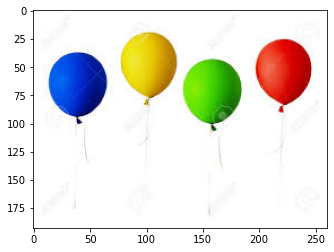

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/balloon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [16]:
blue = np.uint8([[[255,0,0]]]) #BGR순서
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


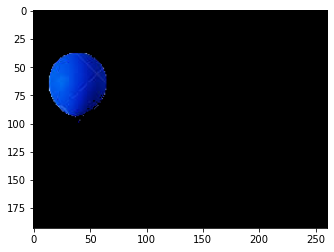

In [13]:
from numpy import mask_indices


hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# HSV 색상공간에서 범위값에 해당하는 부분 추출
# 비슷한 색깔은 h-10, 100, 100에서 h+10, 255, 255사이 (h는 0~179)
mask = cv2.inRange(hsv, (100,100,100), (140,255,255)) # 내가 찾고자하는 색상을 추적하는 코드
plt.imshow(mask)

img2 = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(img2)

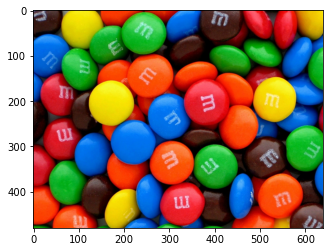

In [22]:
img = cv2.imread('./images/candies.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [26]:
blue = np.uint8([[[0,255,0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[ 60 255 255]]]


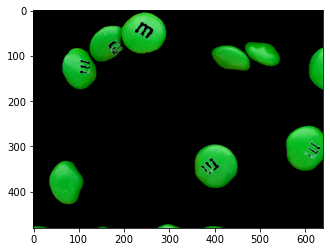

In [27]:
from numpy import mask_indices


hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# HSV 색상공간에서 범위값에 해당하는 부분 추출
# 비슷한 색깔은 h-10, 100, 100에서 h+10, 255, 255사이
mask = cv2.inRange(hsv, (50,100,100), (70,255,255)) # 내가 찾고자하는 색상을 추적하는 코드
plt.imshow(mask)

img2 = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(img2)

### 3. 크로마 키(Chroma key)합성
- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술

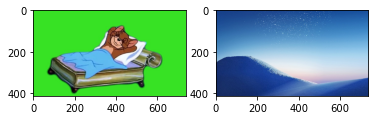

In [33]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/chromakey2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

back = cv2.imread('./images/back2.png')
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(back)
plt.show()


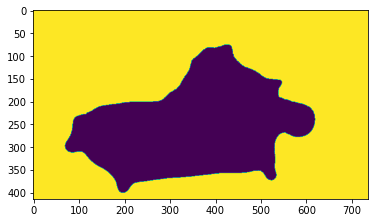

In [34]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

mask = cv2.inRange(hsv, (50, 100, 100), (70,255,255))
plt.imshow(mask)

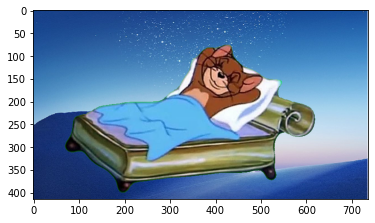

In [36]:
cv2.copyTo(back, mask, img)
# back, mask : mask가 0이 아닌 픽셀에 대해서 back의 이미지 복사연산 수행

plt.imshow(img)

### 4. 이미지 필터링
- blur(노이즈 제거하는데 유용)

In [42]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lenna.png')

def plotFigure(o_image, b_image):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(o_image,cv2.COLOR_BGR2RGB))
    
    plt.subplot(1,2,2)
    plt.title('Blur')
    plt.imshow(cv2.cvtColor(b_image,cv2.COLOR_BGR2RGB))
    plt.show()

#### 4.1 averaging(필터 박스내의 평균을 이용한 방법)
- 필터 박스안의 픽셀들의 값을 평균을 내어 대체한다.

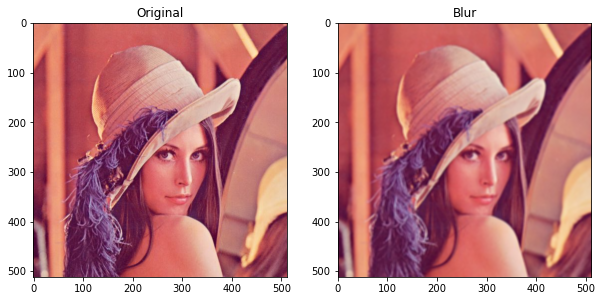

In [43]:
blur1 = cv2.blur(img, (5,5)) # 5,5크기의 필터
plotFigure(img, blur1)

#### 4.2 Gaussian blur
- 가우시안 분포를 이용하여 블러처리하는 방식
- 가우시간 분포의 가중치로 평균을 내어 픽셀값을 업데이트
- 가중치는 중심픽셀에서 멀어질수록 줄어든다.
- 중심 픽셀의 값은 그 주변의 픽셀들이 영향을 가장 크게 받는다.

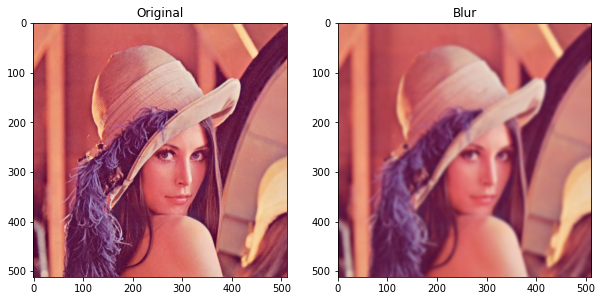

In [45]:
blur2 = cv2.GaussianBlur(img, (15,15), 0) # 0 : 현재 픽셀에만 가중치가 곱해진다.
#                     이미지, 필터크기, 표준편차
plotFigure(img, blur2)

#### 4.3 Median Blur(중앙값)
- 현재 픽셀값을 필터내의 픽셀값의 중앙값으로 대체한다.
- 노이즈 데이터에 대한 영향이 적다.

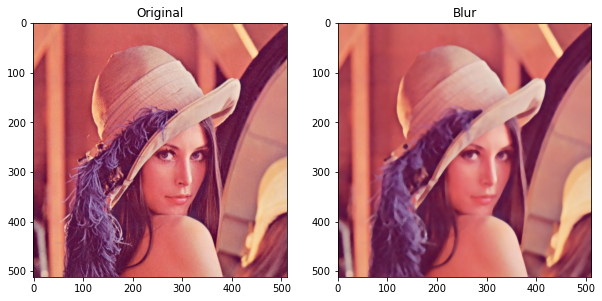

In [47]:
blur3 = cv2.medianBlur(img,7)
plotFigure(img, blur3)

#### 4.4 Bilateral Filter(바이레터럴 필터)
- 지금까지 적용한 블러는 노이즈를 제거하는 효과는 뛰어나지만<br> 그만큼 이미지 객체간의 경계도 흐릿하게 만드는 문제가 있다.
- 이를 개선하기 위해 가우시안 필터와 경계 필터를 결합하여 만들어진 필터

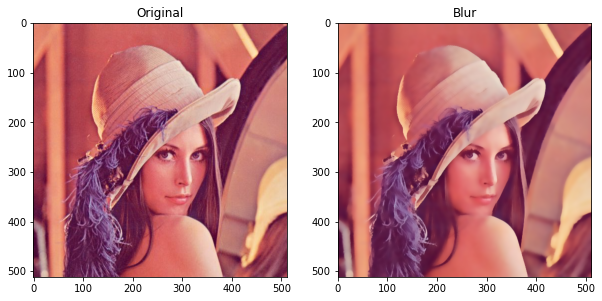

In [50]:
# (img, d, sigmaColorm sigmaSpace)
# d : 필터 크기
# sigmaColor, sigmaSpace : 이미지 내의 서로 영향을 받는 픽셀의 범위
# 일반적으로 2개의 매개변수는 같은 값을 사용하며, 범위는 10~150을 권장한다.
blur4 = cv2.bilateralFilter(img, 10, 75, 75)

plotFigure(img, blur4)

### 5. 모폴로지 - 침식과 팽창
- morphology : 형태학
- 노이즈제거, 구멍채우기, 끊어진선 이어붙이기 등 형태학적 연산을 말한다.
- 모폴로지 연산은 검은색과 흰색으로만 구성되어있는 바이너리(binary)이미지에 적용할 수 있다.

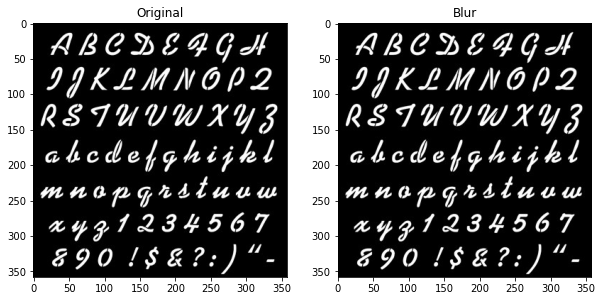

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/number.png', cv2.IMREAD_GRAYSCALE)

plotFigure(img, img)

In [60]:
def plotFigur2(o_image, b_image):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(o_image,cv2.COLOR_BGR2RGB))
    
    plt.subplot(1,2,2)
    plt.title('morphology')
    plt.imshow(cv2.cvtColor(b_image,cv2.COLOR_BGR2RGB))
    plt.show()

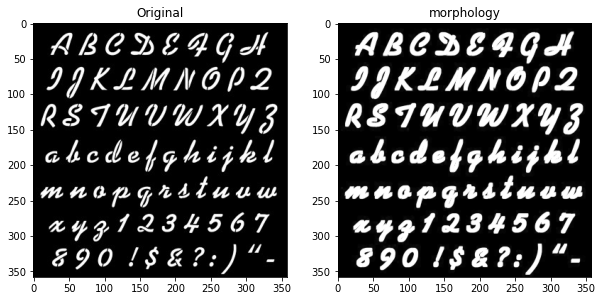

In [64]:
# 필터 크기 설정
kernel  = np.ones((3,3), np.uint8)

# iteration = 1: 반복횟수
erosion = cv2.erode(img, kernel, iterations=1) # 침식  (한번침식시키겠다)
# plotFigur2(img, erosion)

dilation = cv2.dilate(img, kernel, iterations=1) # 팽창
plotFigur2(img, dilation)

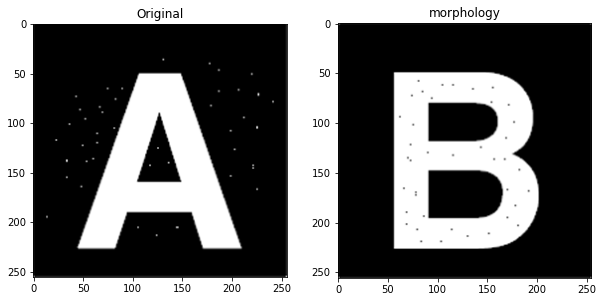

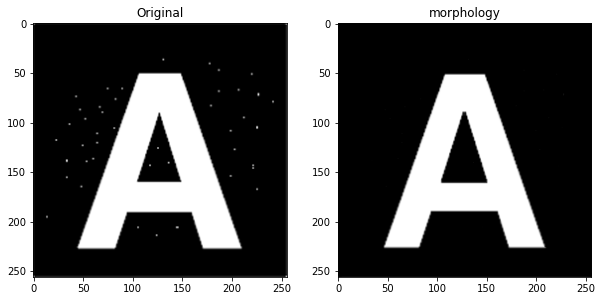

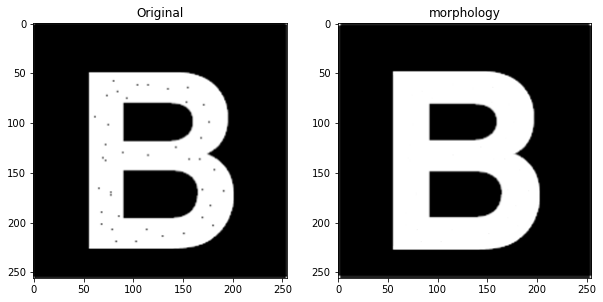

In [68]:
img_a = cv2.imread('./images/noise_A.png')
img_b = cv2.imread('./images/noise_B.png')

plotFigur2(img_a, img_b)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img_a, kernel, iterations=1)
plotFigur2(img_a, erosion)

dilation = cv2.dilate(img_b, kernel, iterations=1)
plotFigur2(img_b, dilation)


#### 5.1 Opening과 Closing
- Opening : erosion 수행후에 바로 dilate를 수행하여 원래 이미지 크기로 돌려놓는다.
- Closing : dilate수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려놓는다.

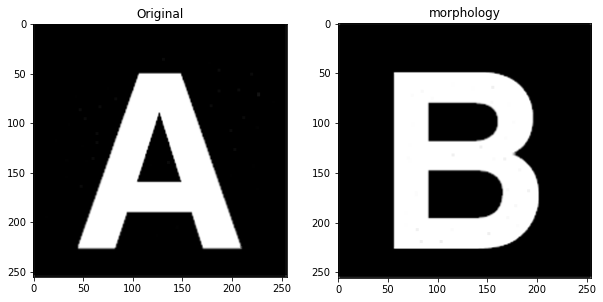

In [71]:
opening = cv2.morphologyEx(img_a, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(img_b, cv2.MORPH_CLOSE,kernel, iterations=1)

plotFigur2(opening, closing)

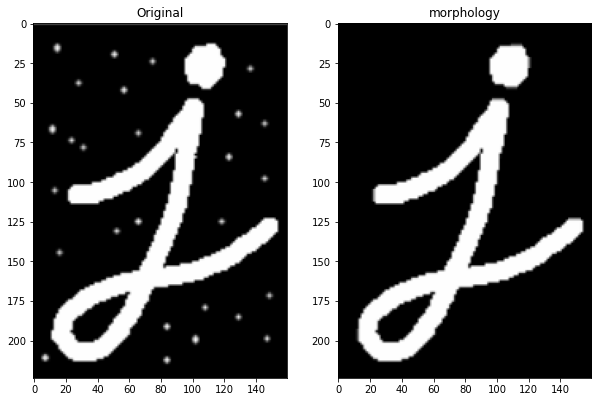

In [75]:
img1= cv2.imread('./images/object.png', cv2.IMREAD_GRAYSCALE)
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel, iterations=3)

plotFigur2(img1, opening)